In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
# naming columns, original csv has no columns name header
columns_names = ['transaction_id','client_id', 'value', 'merchant_id', 'date', 'time', 'fraud']

# reading in train dataset
train = pd.read_csv('train.csv', names=columns_names, index_col='transaction_id')

In [3]:
# checking data balance
non_fraud = train[train['fraud'] == 0]['fraud'].count()
fraud = train[train['fraud'] == 1]['fraud'].count()
fraud_percentage = (fraud/(fraud+non_fraud))*100

print(f'regular transactions:{non_fraud}\nfraud transactions:{fraud}')

regular transactions:99990
fraud transactions:10


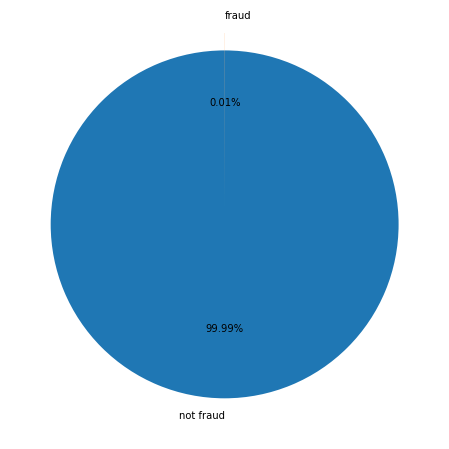

In [4]:
# inbalanced dataset
plt.figure(figsize=(20,8))

labels = ('not fraud', 'fraud')
# percentages
sizes = [(100-fraud_percentage), fraud_percentage]
# explode the fraud slide of the pie
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',startangle=90);

In [5]:
train.head(20)

,client_id,value,merchant_id,date,time,fraud
transaction_id,,,,,,
1,340,29756,2023,0,22,0
2,227,3318,84,0,66,0
3,430,12191,814,0,128,0
4,142,2884,510,0,197,0
5,452,34639,1993,0,242,0
6,478,11941,1407,0,291,0
7,232,34050,2031,0,323,0
8,270,32764,246,0,390,0
9,204,3295,4227,0,432,0


In [6]:
train.describe()

,client_id,value,merchant_id,date,time,fraud
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.0000
mean,249.325500,17619.775420,2496.162980,23.15594,55759.620460,0.0001
std,101.999556,14203.647925,1445.111319,13.66148,19922.284472,0.0100
min,0.000000,651.000000,0.000000,0.00000,1.000000,0.0000
25%,176.000000,3709.000000,1242.000000,11.00000,42624.000000,0.0000
50%,249.000000,12219.500000,2495.000000,23.00000,57170.000000,0.0000
75%,322.000000,33664.000000,3747.000000,35.00000,71787.250000,0.0000
max,497.000000,49903.000000,4999.000000,47.00000,86399.000000,1.0000


# DATA VISUALIZATION

In [7]:
# getting clients that have some fraud case
fraud_cases = train[train['fraud'] == 1]['client_id']
fraud_cases = train[train['client_id'].isin(fraud_cases)].sort_values(by=['client_id'])

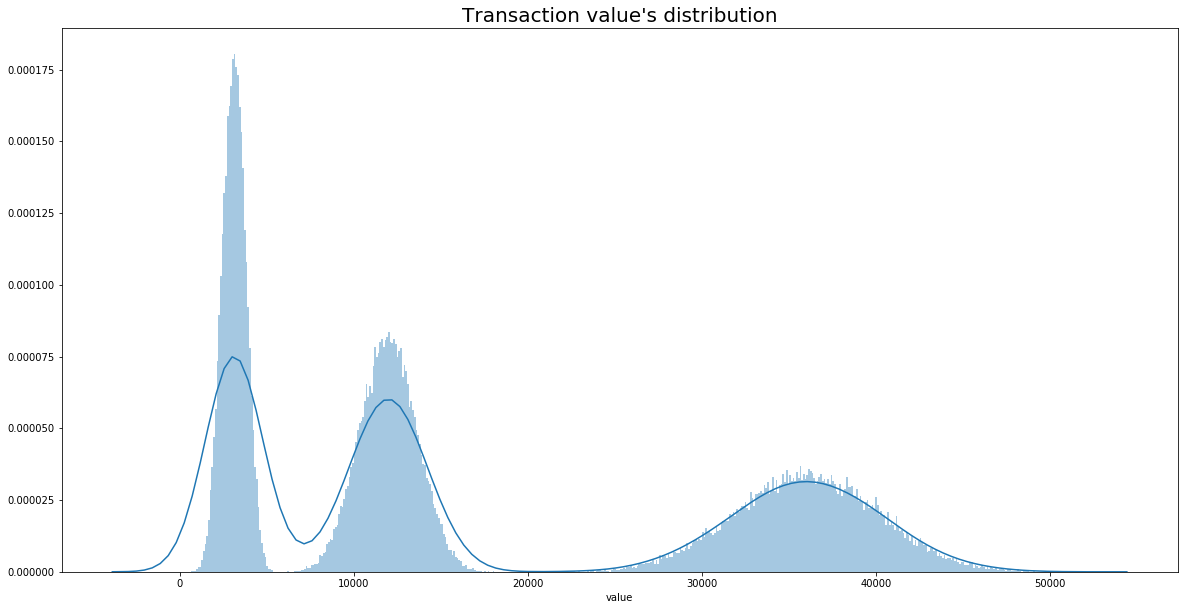

In [8]:
# all transaction value distribition
plt.figure(figsize=(20,10))
plt.title("Transaction value's distribution", fontsize=20)
sns.distplot(a=train['value'], bins=500);

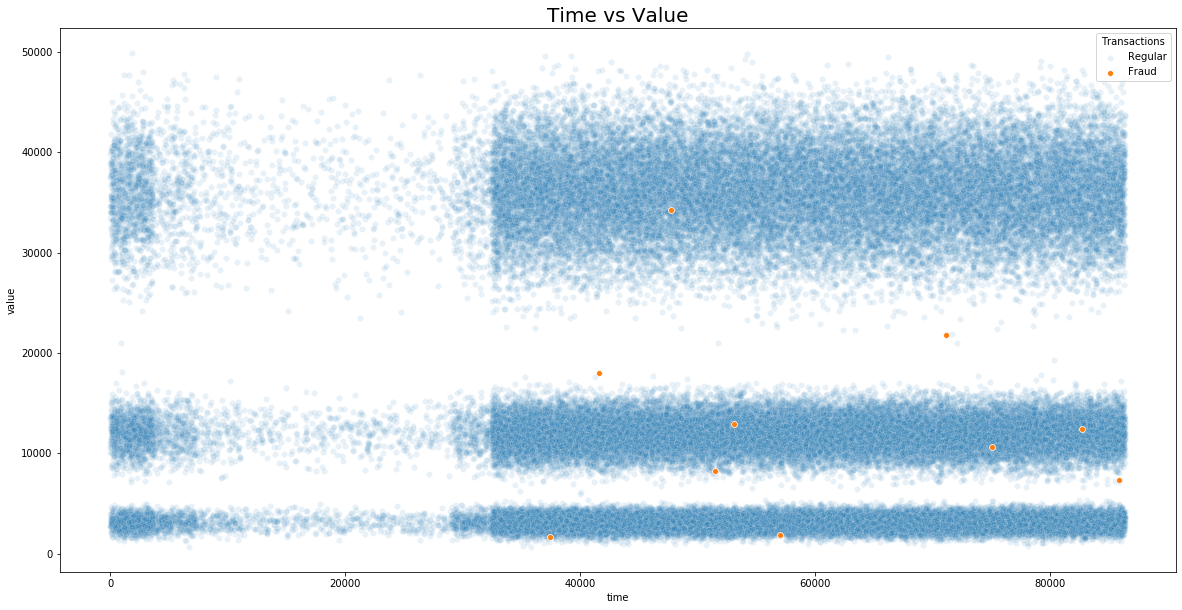

In [9]:
# checking transactions vs time
plt.figure(figsize=(20,10))
plt.title(f'Time vs Value', fontsize=20)
sns.scatterplot(x='time', y='value', data=train, alpha=0.1)
sns.scatterplot(x='time', y='value', data=fraud_cases[fraud_cases.fraud == 1])
plt.legend(title='Transactions', loc='upper right', labels=['Regular', 'Fraud']);

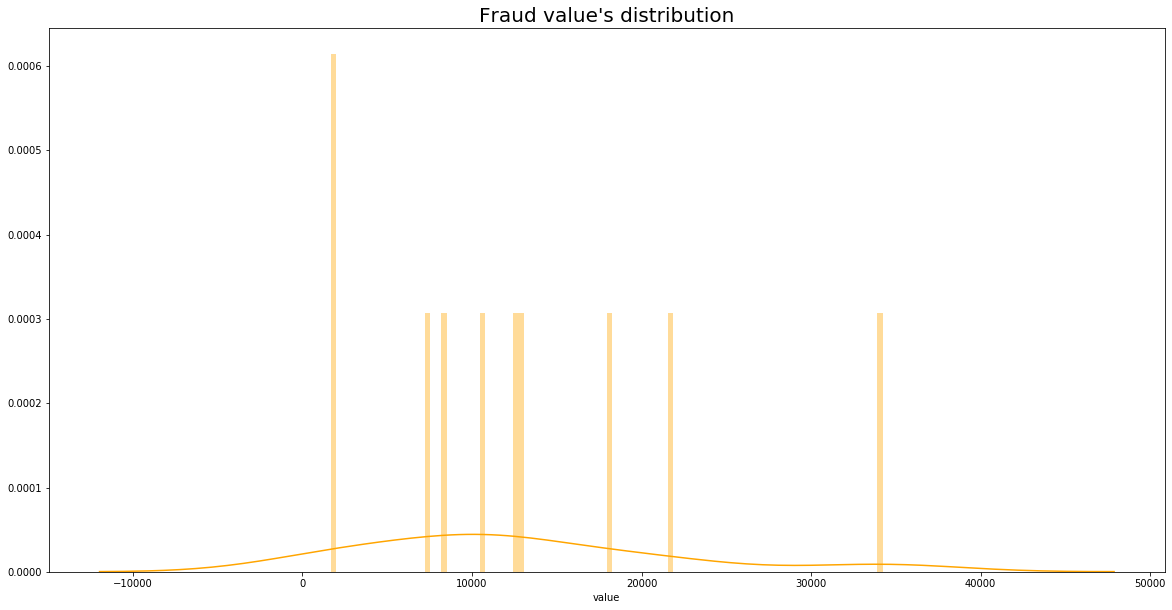

In [10]:
# fraud transaction value distribition
plt.figure(figsize=(20,10))
plt.title("Fraud value's distribution", fontsize=20)
sns.distplot(a=fraud_cases[fraud_cases['fraud']==1]['value'], bins=100, color='orange');

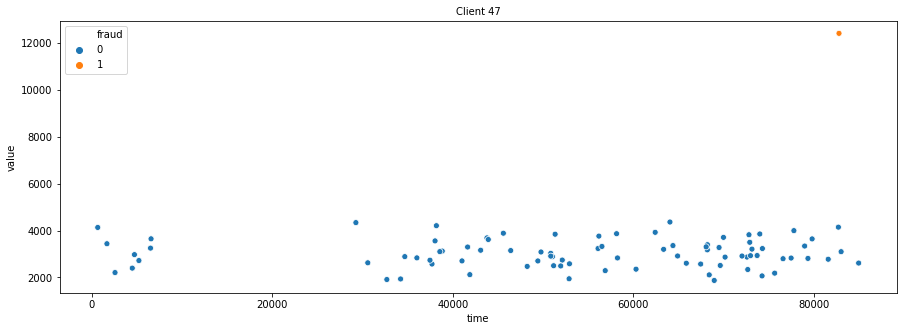

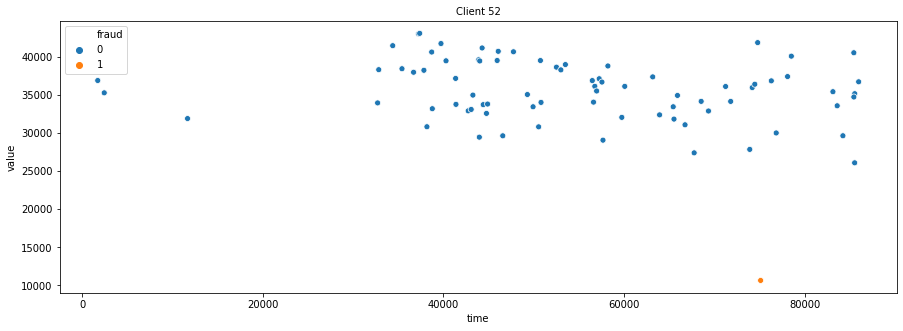

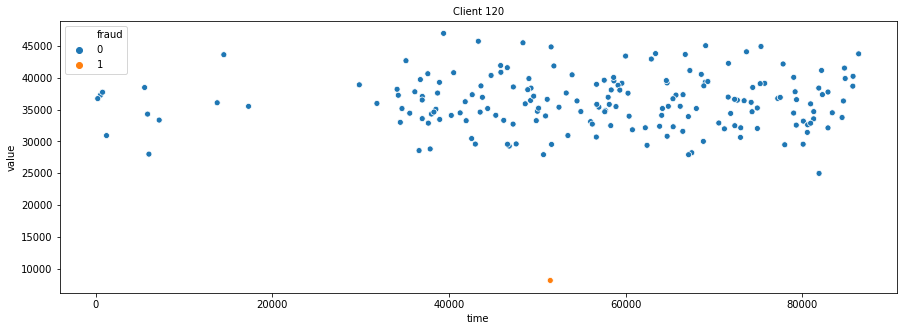

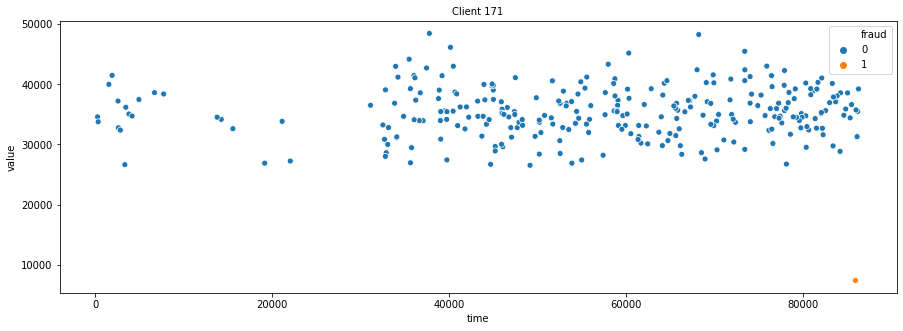

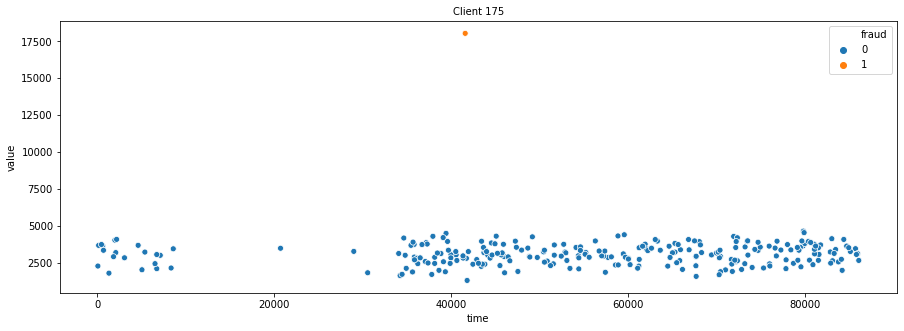

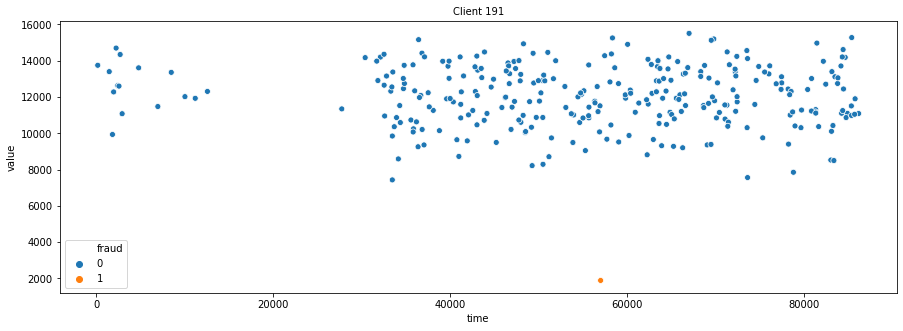

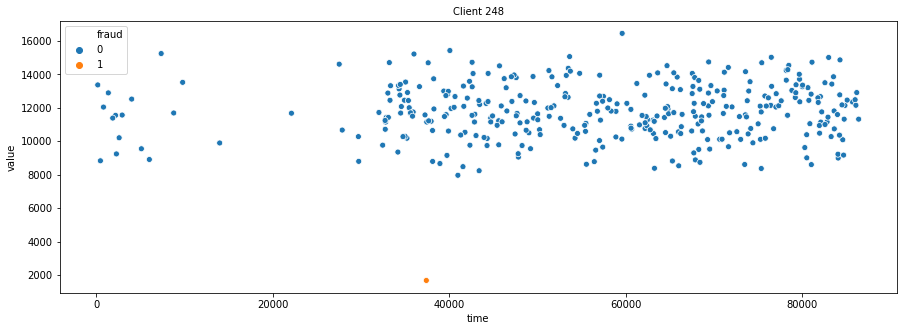

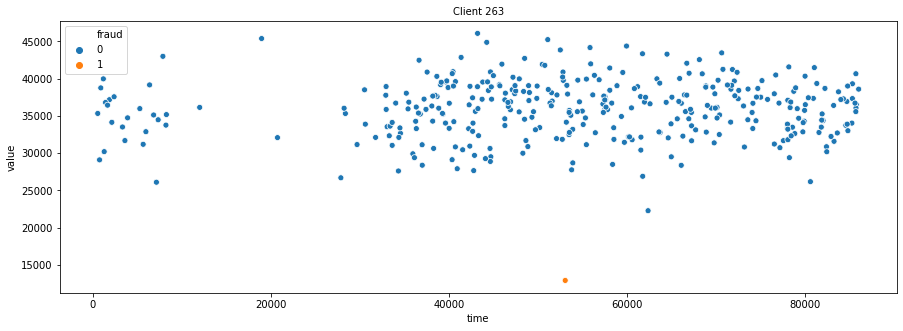

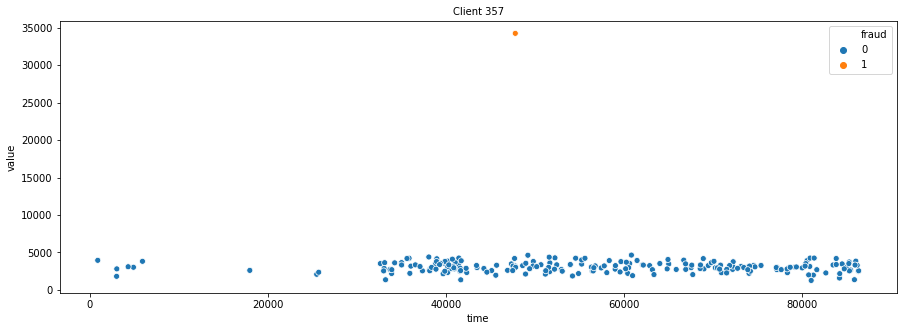

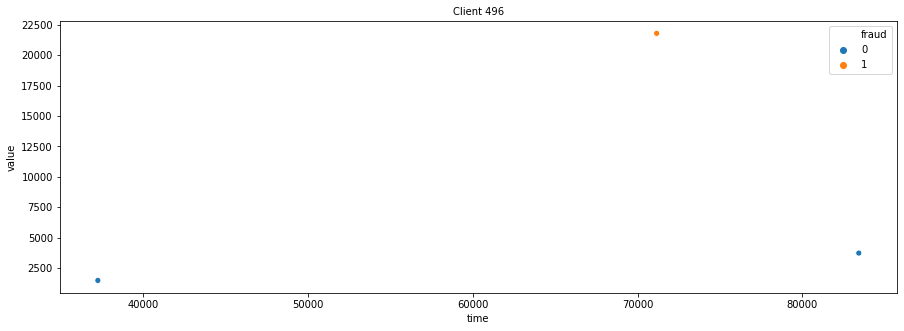

In [11]:
# visualising clients with fraud transactions
for client in fraud_cases['client_id'].unique():
    # plot transactions value as dots for every fraud client case
    plt.figure(client, figsize=(15,5))
    plt.title(f'Client {client}', fontsize=10)
    sns.scatterplot(x='time',
                    y='value',
                    hue='fraud',
                    data=fraud_cases[fraud_cases['client_id'] == client]);


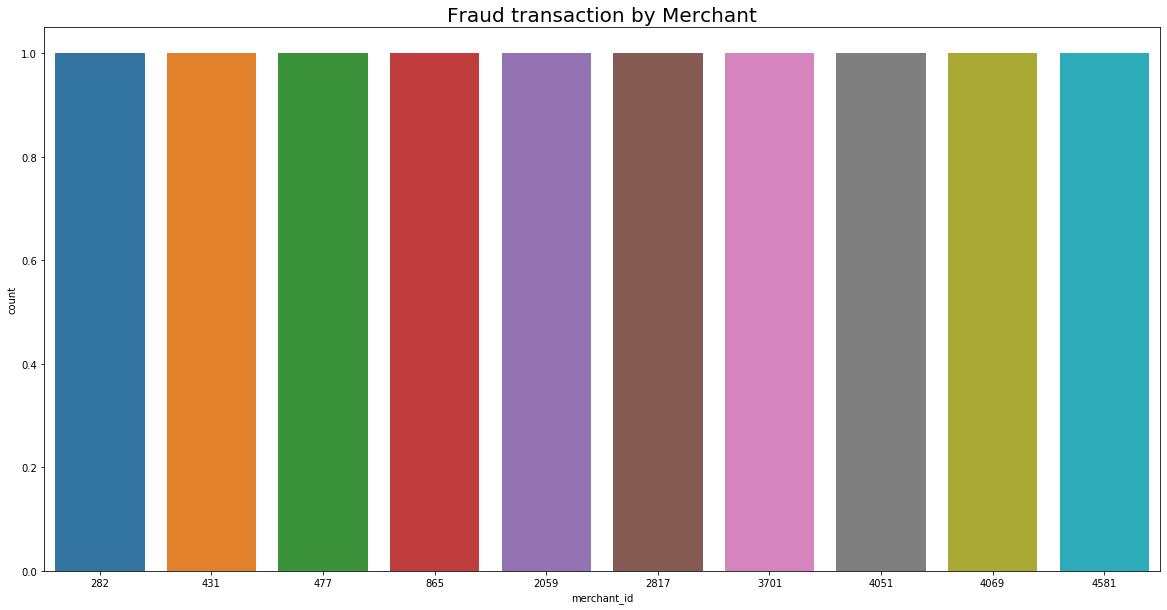

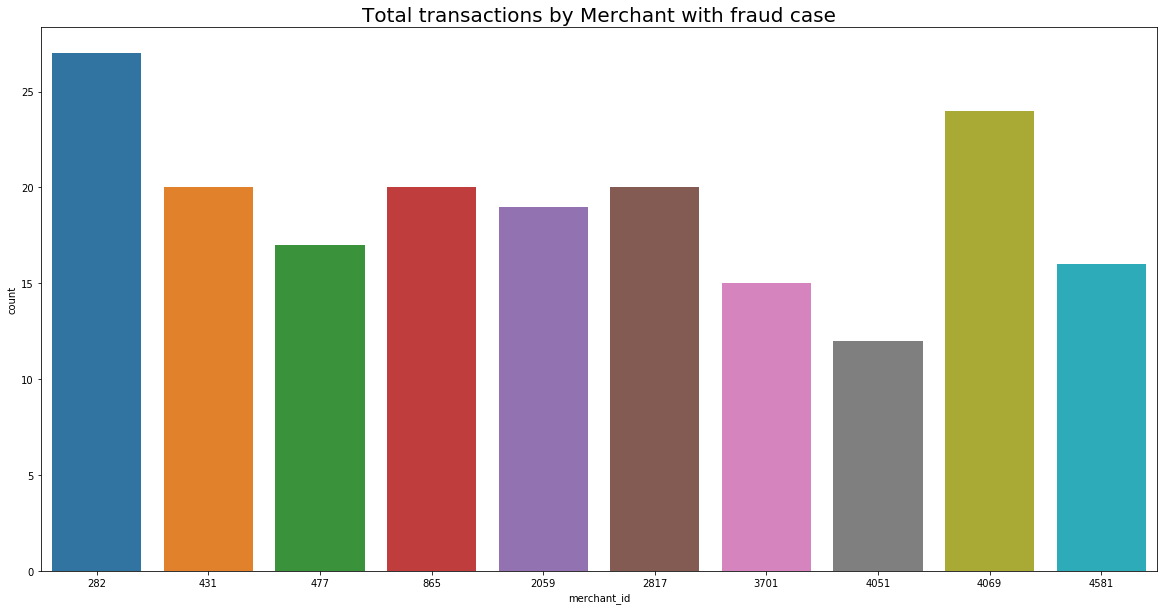

In [12]:
# fraud transaction by mechant id
plt.figure(figsize=(20,10))
plt.title("Fraud transaction by Merchant", fontsize=20)
sns.countplot(x='merchant_id', data=fraud_cases[fraud_cases['fraud']==1]);

# total transactions by merchant with a fraud transaction
fraund_merchants = train[train['merchant_id'].isin(fraud_cases[fraud_cases['fraud']==1]['merchant_id'])]

plt.figure(figsize=(20,10))
plt.title("Total transactions by Merchant with fraud case", fontsize=20)
sns.countplot(x='merchant_id', data=fraund_merchants);

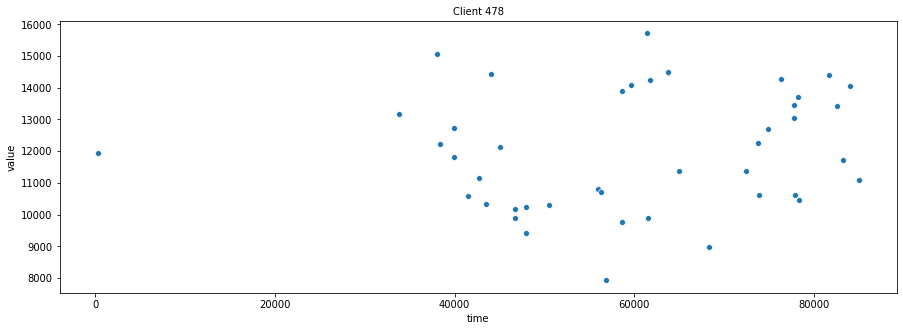

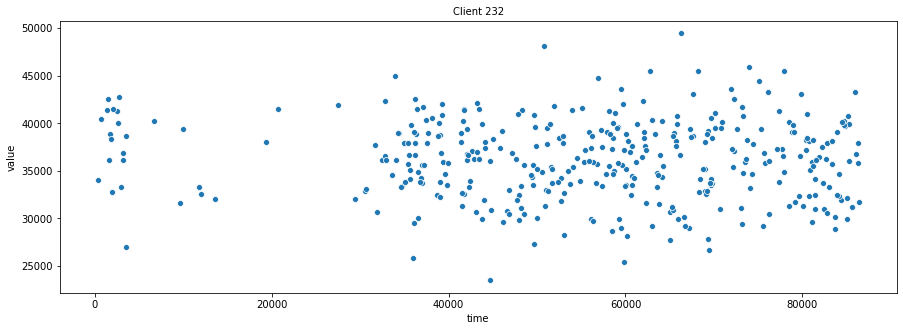

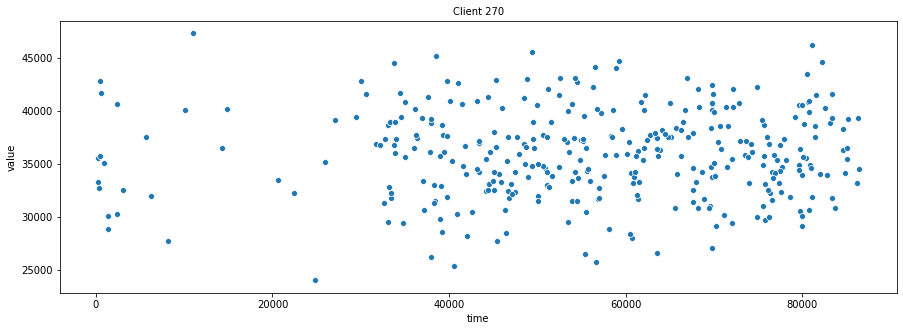

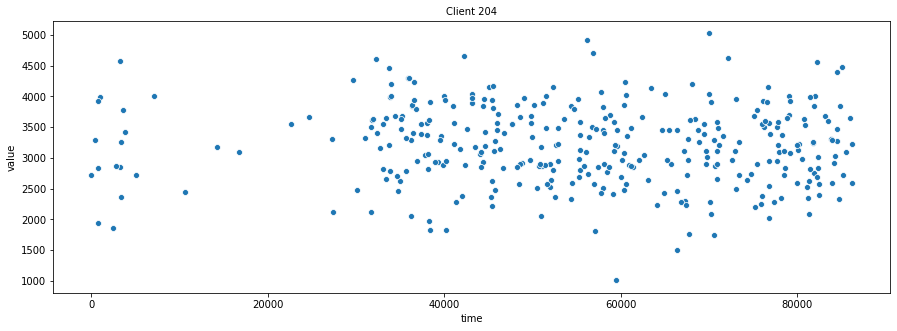

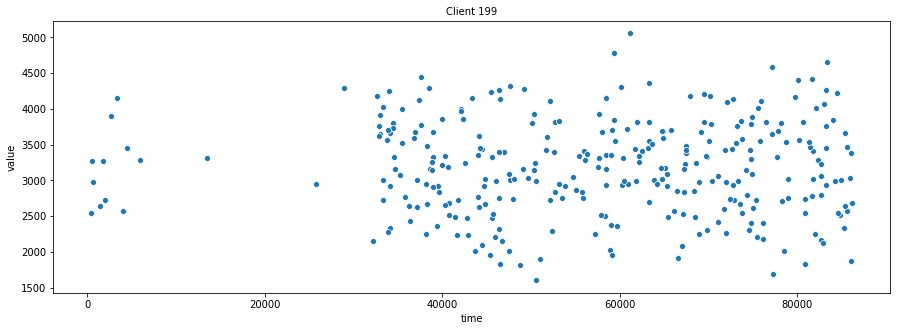

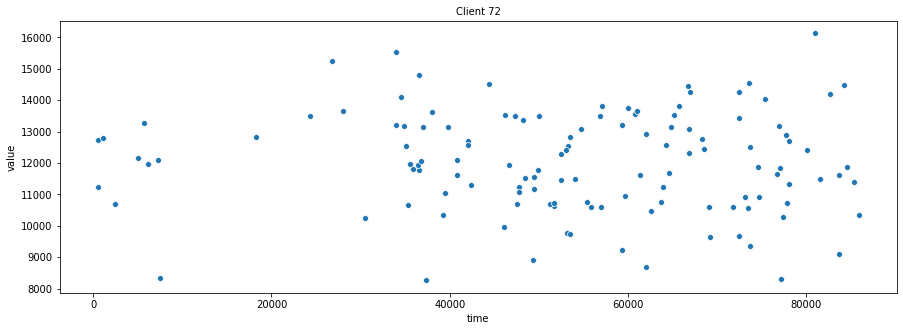

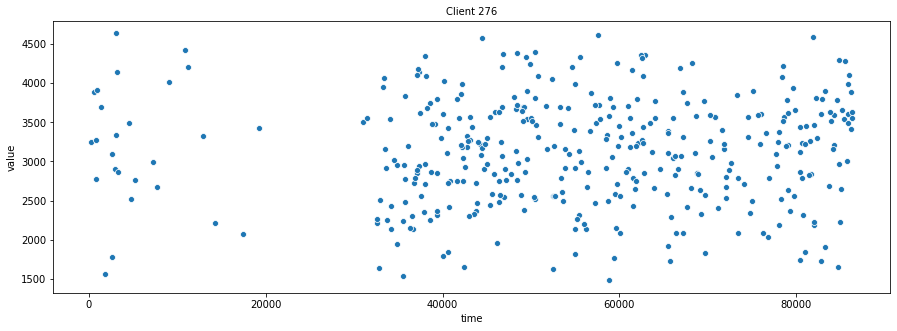

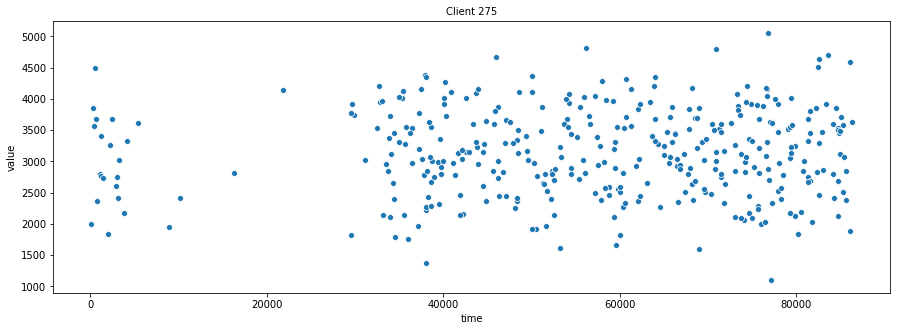

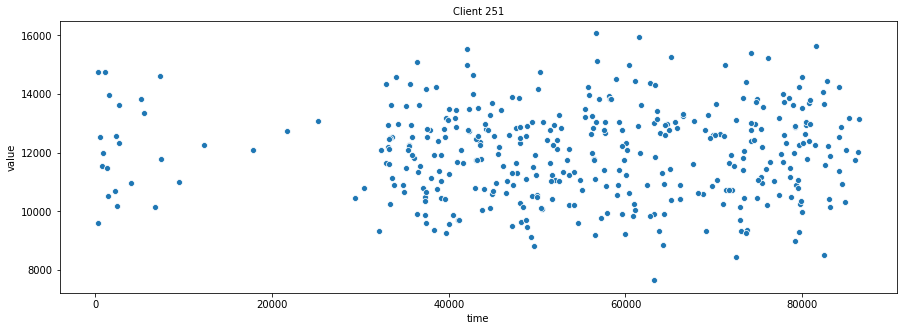

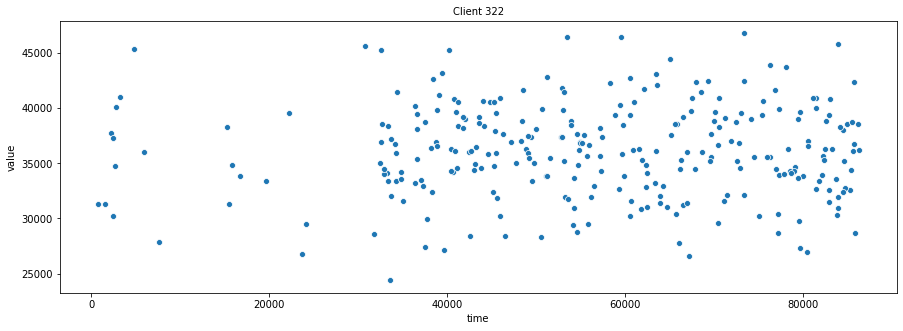

In [13]:
# visualising some clients with regular transactions
for client in train.client_id.unique()[5:15]:
    plt.figure(client, figsize=(15,5))
    plt.title(f'Client {client}', fontsize=10)
    sns.scatterplot(x='time',
                    y='value',
                    data=train[train['client_id'] == client]);

In [14]:
# extra tranformations, might be useful (or not...)
def seconds_to_24hours(seconds):
    # get hours from seconds
    hours24 = (seconds / 3600)
    # get minutes
    minutes = (hours24 % 1) * 60
    # returns hours and minutes
    time = float( str(int(hours24)) +'.'+ str(int(minutes)) )
    return time

In [15]:
# apply function to time column and create a new column hours24
train['hours24'] = train['time'].apply(seconds_to_24hours)
fraud_cases['hours24'] = fraud_cases['time'].apply(seconds_to_24hours)

In [16]:
train.tail(10)

,client_id,value,merchant_id,date,time,fraud,hours24
transaction_id,,,,,,,
99991,228,30157,2978,47,46006,0,12.46
99992,205,3560,864,47,46038,0,12.47
99993,305,11239,3943,47,46071,0,12.47
99994,309,37006,658,47,46092,0,12.48
99995,268,13759,2363,47,46118,0,12.48
99996,55,12942,9,47,46151,0,12.49
99997,285,31791,4860,47,46173,0,12.49
99998,396,32133,4774,47,46209,0,12.50
99999,254,36451,3559,47,46236,0,12.50


### To detect fraud we will fit a Gaussian distribution on a per client basis, to accomplish this we need to ignore the fraud outliers since they don't belong to our distributions.

In [17]:
# getting mean and std on every client on regular transactions only
agg_trans = train[train.fraud == 0].groupby('client_id').agg({'value': ['mean', 'std']})
agg_trans['value'].head()

,mean,std
client_id,,
0,3293.0,351.227846
1,2717.0,NaN
2,39672.0,3897.734791
3,13029.0,1663.434800
4,12057.6,2080.312789


In [18]:
# joining stats to train dataframe
train = pd.merge(train, agg_trans['value'], on=['client_id'])

In [19]:
# creating z-score
train['z_score'] = (train['value']-train['mean'])/train['std']
train.head()

,client_id,value,merchant_id,date,time,fraud,hours24,mean,std,z_score
0,340,29756,2023,0,22,0,0.00,35950.213058,3898.760368,-1.588765
1,340,34335,1949,0,35765,0,9.56,35950.213058,3898.760368,-0.414289
2,340,40594,1324,0,57363,0,15.56,35950.213058,3898.760368,1.191093
3,340,39339,1086,0,66721,0,18.32,35950.213058,3898.760368,0.869196
4,340,36056,3519,0,78133,0,21.42,35950.213058,3898.760368,0.027133


### Checking transactions with a z-scores outside a 99.99% confidence interval (+- 3.891)
these transactions are very likely to be outside the client distribution:

In [20]:
fraud_pred = train[(train.z_score > 3.891) | (train.z_score < -3.891)]
fraud_pred

,client_id,value,merchant_id,date,time,fraud,hours24,mean,std,z_score
18005,171,7380,4581,19,85927,1,23.52,35413.130742,4110.118876,-6.820516
25934,263,12931,2059,16,53092,1,14.44,35951.927577,3793.990875,-6.067734
35719,357,34236,4051,16,47773,1,13.16,3059.417062,657.036483,47.450307
38686,191,1887,4069,18,57040,1,15.50,12046.692568,1632.373700,-6.223877
45145,248,1671,282,25,37416,1,10.23,11791.512821,1594.463211,-6.347285
49966,269,19289,3939,1,80334,0,22.18,36007.968586,3982.632853,-4.197969
74207,52,10656,477,31,75126,1,20.52,35592.116883,3850.758469,-6.475638
74540,120,8186,865,24,51472,1,14.17,36140.815217,4140.087706,-6.752228
83720,175,18038,431,19,41588,1,11.33,3084.604651,672.004070,22.251942
90391,47,12423,2817,22,82763,1,22.59,3033.847059,604.874200,15.522489
